<a href="https://colab.research.google.com/github/shubhj17/Machine_Learning_Algos/blob/master/Polynomial_Regression_on_california_housing_dataset_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Importing Libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from IPython.display import clear_output

In [0]:
# Importing Data into pandas dataframe

data = pd.read_csv("/content/sample_data/california_housing_train.csv")

In [5]:
# Checking null values if present in dataset

data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

In [15]:
# Checking correlation for all the columns for selecting our best feature. 

data.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.925208,-0.114250,0.047010,0.071802,0.101674,0.059628,-0.015485,-0.044982
latitude,-0.925208,1.000000,0.016454,-0.038773,-0.069373,-0.111261,-0.074902,-0.080303,-0.144917
housing_median_age,-0.114250,0.016454,1.000000,-0.360984,-0.320434,-0.295890,-0.302754,-0.115932,0.106758
total_rooms,0.047010,-0.038773,-0.360984,1.000000,0.928403,0.860170,0.919018,0.195383,0.130991
total_bedrooms,0.071802,-0.069373,-0.320434,0.928403,1.000000,0.881169,0.980920,-0.013495,0.045783
population,0.101674,-0.111261,-0.295890,0.860170,0.881169,1.000000,0.909247,-0.000638,-0.027850
households,0.059628,-0.074902,-0.302754,0.919018,0.980920,0.909247,1.000000,0.007644,0.061031
median_income,-0.015485,-0.080303,-0.115932,0.195383,-0.013495,-0.000638,0.007644,1.000000,0.691871
median_house_value,-0.044982,-0.144917,0.106758,0.130991,0.045783,-0.027850,0.061031,0.691871,1.000000


In [0]:
#Selecting feature and target variable based on above result. 

target  = data['median_house_value']
#target = np.array(target)
#target = target.reshape(1,len(target))

# Converting feature into numpy array
features = data[['median_income','total_rooms']]
#features = np.array(features)


In [23]:
print("target :", target.shape)
print("feature :", features.shape)

target : (17000,)
feature : (17000, 2)


In [0]:
# Normalising our dataset 

target = target/target.max()
features = features/features.max()

In [0]:
# Defining Functions 

def curve(m,x,c):
  return m[0]*x.T.iloc[0] + m[1]*(x.T.iloc[1]**2) + c

def slope1(m,x,c,y):
  return 2*np.mean((curve(m,x,c)-y)*(x.T.iloc[0]**1))

def slope2(m,x,c,y):
  return 2*np.mean((curve(m,x,c)-y)*(x.T.iloc[1]**2))

def derivative_intercept(m,x,c,y):
  return 2*np.mean((curve(m,x,c)-y))

def accuracy_func(error_param,y):
  return 100 - (error_param/np.mean(y**2))*100

def error(m,x,c,y):
  return np.mean((curve(m,x,c)-y)**2)


In [25]:
slope2(m,features,2,target)

2189140868319728.8

Error :  0.028610031737577302
Accuracy of Algorithm:  87.32384132882669
Slope Values: [1.102820279261331, 0.44817620155932725]
Intercept Value:  0.12589815243140312


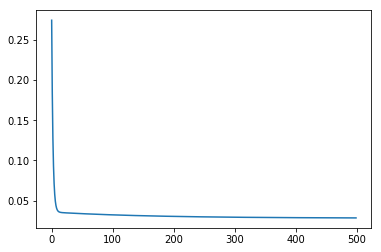

In [42]:
m = [random.random(),random.random()]
c = random.random()

iters = 500
lr = 0.1
cost = []

for i in range(iters):
  m[0] = m[0] - lr*slope1(m,features,c,target)
  m[1] = m[1] - lr*slope2(m,features,c,target)
  c    = c - lr*derivative_intercept(m,features,c,target)
  cost.append(error(m,features,c,target))
  clear_output(True)
  print("Error : ",error(m,features,c,target))
  
print("Accuracy of Algorithm: ",accuracy_func(error(m,features,c,target),target))
print("Slope Values:", m)
print("Intercept Value: ",c)
plt.plot(cost)
plt.show()

  
  
  

In [51]:
# Comparing actual values and predicted values

print("Predicted Values: ")
np.array(curve(m,features,c))

Predicted Values: 


array([0.24551641, 0.2779302 , 0.24743517, ..., 0.35099356, 0.27367069,
       0.34857299])

In [52]:
print("Actual Values: ")
np.array(target)

Actual Values: 


array([0.13379973, 0.16019968, 0.17139966, ..., 0.20719959, 0.17159966,
       0.18919962])